# Seaborn绘图

[ref1](https://blog.csdn.net/ice_martin/article/details/61617053)
[ref2](https://blog.csdn.net/sinat_30353259/article/details/80834208#9绘制气泡图)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. demo 绘制数学函数

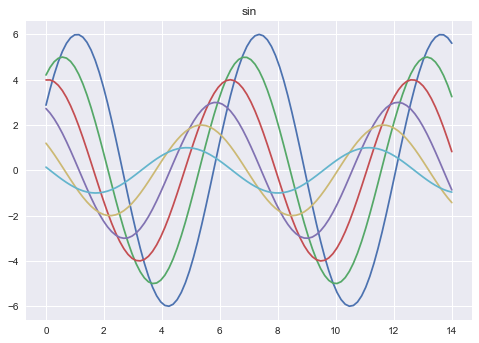

In [14]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        y = np.sin(x+i*0.5)*(7-i)*flip
        plt.plot(x, y)
    plt.title("sin")
    plt.show()
sinplot()

## 2. 绘制单变量

- distplot 绘制直方图，有多个可配置参数（绘制核函数、取消柱状图、控制箱体数量）
- kdeplot  绘制核函数

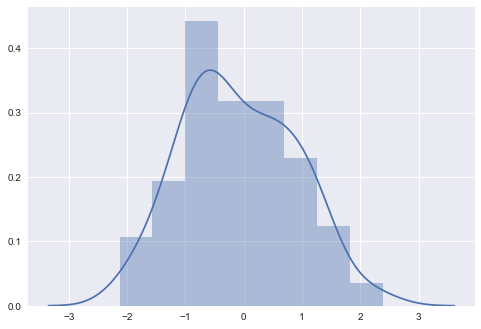

In [15]:
x = np.random.normal(size=100)
sns.distplot(x)
plt.show()

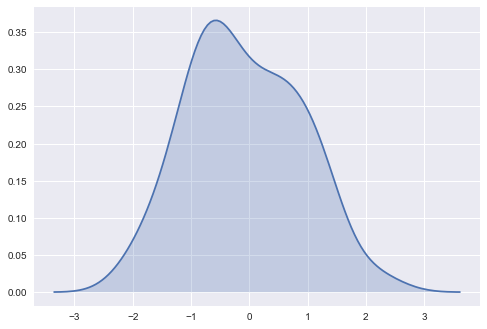

In [16]:
sns.kdeplot(x, shade=True)
plt.show()

## 3. 绘制二元分布
  - jointplot 可配置参数丰富
  - pairplot 绘制成对关系

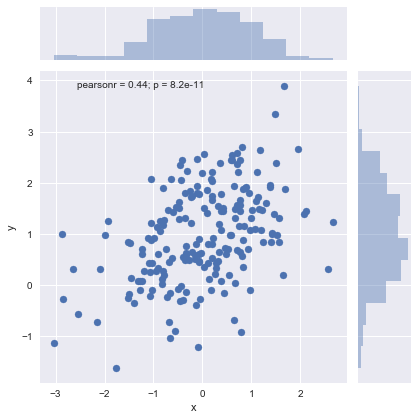

In [20]:
mean,cov = [0,1],[(1,.5),(.5,1)]
data = np.random.multivariate_normal(mean,cov,200)
df = pd.DataFrame(data,columns=['x','y'])

sns.jointplot(x='x', y='y', data=df)
plt.show()

In [21]:
sns.jointplot?

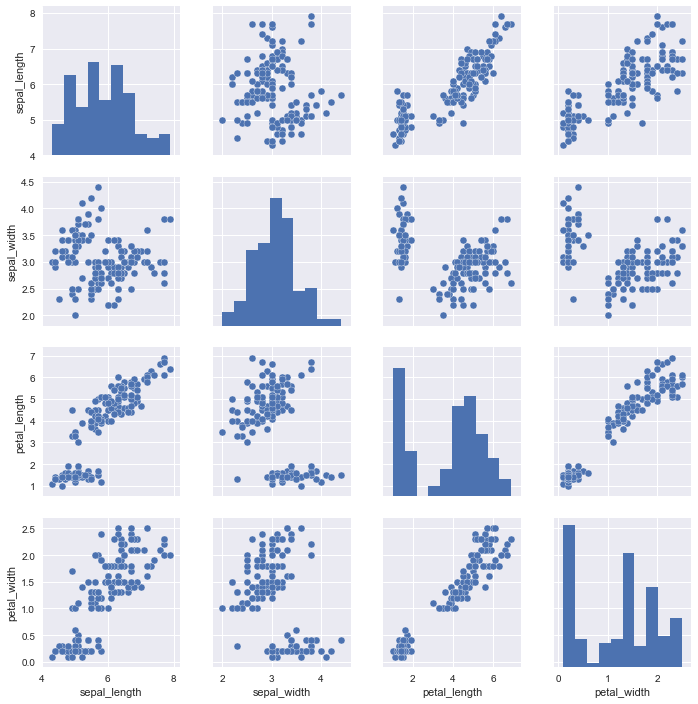

In [22]:
iris = sns.load_dataset("iris") 
# iris是一个花种类的数据集，seaborn自带，scikit-learn也均包含
sns.pairplot(iris)
plt.show()

## 4. 分类统计
  - 分类散点图 stripplot\swarmplot
  - 箱型图 boxplot \ violinplot

In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


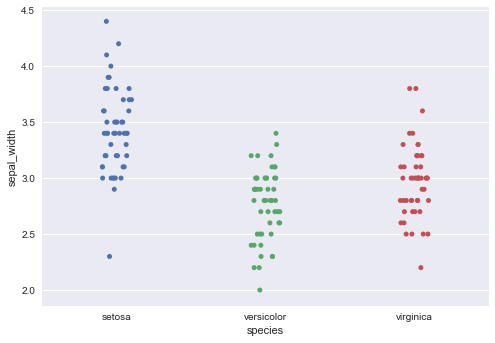

In [27]:
# 分类散点图
sns.stripplot(x='species',y='sepal_width',data=iris, jitter=True)
plt.show()

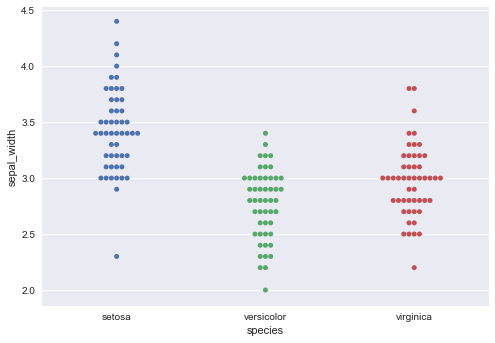

In [31]:
sns.swarmplot(x='species',y='sepal_width',data=iris)  # 使用hue来添加分类的类别
plt.show()

D:\kktest\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
D:\kktest\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


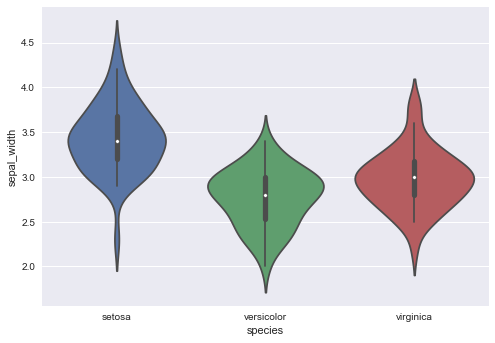

In [35]:
sns.violinplot(x='species',y='sepal_width', data=iris)
plt.show()

D:\kktest\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


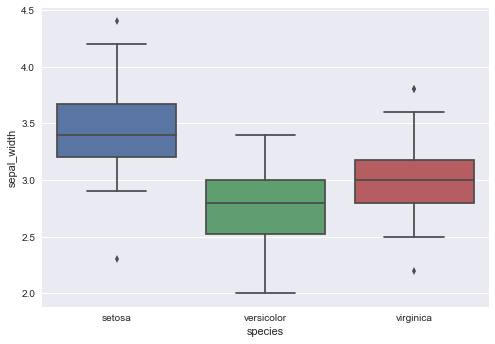

In [36]:
sns.boxplot(x='species',y='sepal_width', data=iris)
plt.show()

## 5. 统计估计
  - barplot 条形图
  - counterplot 统计图，统计个数

D:\kktest\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


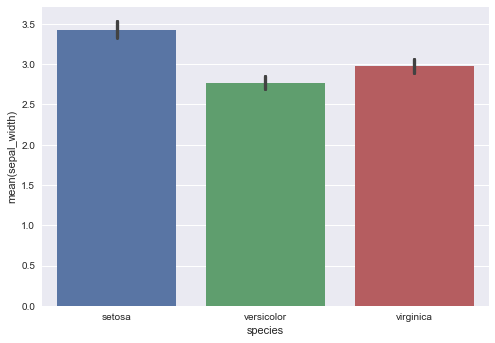

In [38]:
sns.barplot(x='species',y='sepal_width', data=iris)
plt.show()

D:\kktest\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


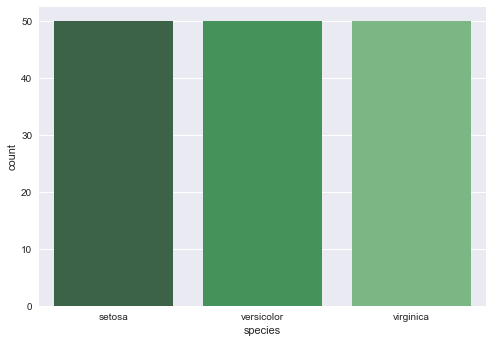

In [41]:
sns.countplot(x="species", data=iris, palette="Greens_d")
plt.show()

## 6. 多面板分类图

> 绘制多分类的图形最主要使用的就是factorplot()函数，使用factorplot（）的主要优点是，很容易绘图同时观测其他分类变量以此来对照：

In [44]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
sns.factorplot?

D:\kktest\lib\site-packages\seaborn\categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


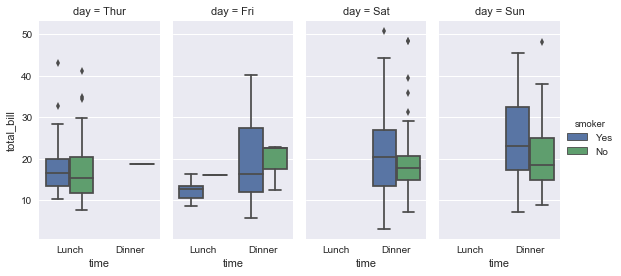

In [43]:
sns.factorplot(x="time", y="total_bill", hue="smoker", col="day", data=tips, kind="box", size=4, aspect=.5)
plt.show()

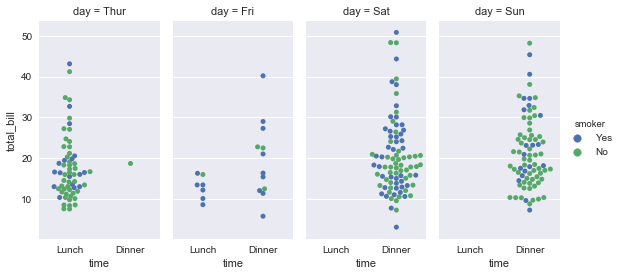

In [50]:
sns.factorplot(x="time", y="total_bill", hue="smoker", col="day", data=tips, kind="swarm", size=4, aspect=.5)
plt.show()

## 7. [图形风格设置](http://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial)

  - set_style 设置全局风格
  - despine Removing axes spines
  - axes_style 设置临时风格 with sns.axes_style("white")
  - set_content
  - set_palette 调色
  - color_palette 临时性调色

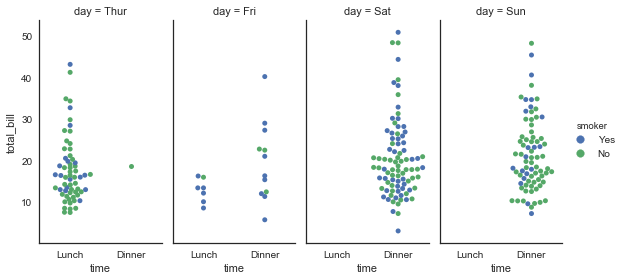

In [64]:
# 改变主题
# 有五个预设的seaborn主题：暗网格(darkgrid)，白网格(whitegrid)，全黑(dark)，全白(white)，全刻度(ticks)。用来适合不同的应用和个人喜好
sns.set_style("white")
sns.factorplot(x="time", y="total_bill", hue="smoker", col="day", data=tips, kind="swarm", size=4, aspect=.5)
plt.show()

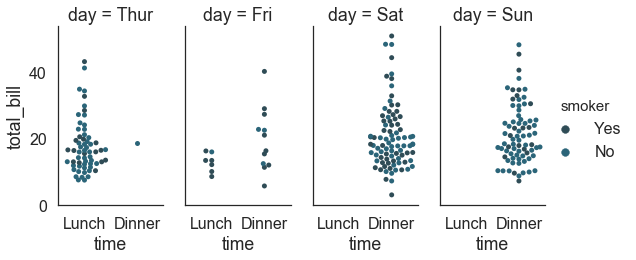

In [73]:
sns.factorplot(x="time", y="total_bill", hue="smoker", col="day", data=tips, kind="swarm", size=4, aspect=.5)
sns.despine()
sns.set_context("poster")
plt.show()

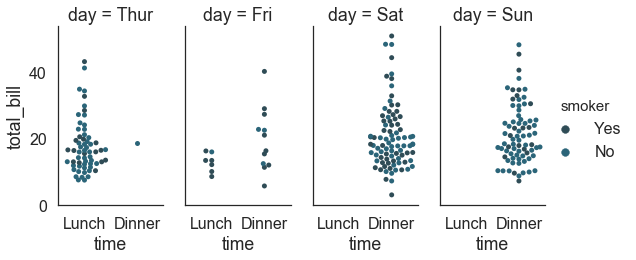

In [72]:
sns.despine()
sns.set_context("poster")
sns.set_palette("PuBuGn_d")
sns.factorplot(x="time", y="total_bill", hue="smoker", col="day", data=tips, kind="swarm", size=4, aspect=.5)
plt.show()